In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [95]:
df = pd.read_csv("BostonHousing.csv")
df.shape

(506, 14)

In [96]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [97]:
(df.isnull().sum()/len(df))*100

crim       0.000000
zn         0.000000
indus      0.000000
chas       0.000000
nox        0.000000
rm         0.988142
age        0.000000
dis        0.000000
rad        0.000000
tax        0.000000
ptratio    0.000000
b          0.000000
lstat      0.000000
medv       0.000000
dtype: float64

In [98]:
df.dropna(inplace=True, axis = 0)

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,501.0,3.647414,8.637688,0.00632,0.08199,0.26169,3.69311,88.9762
zn,501.0,11.402196,23.414214,0.00000,0.00000,0.00000,12.50000,100.0000
indus,501.0,11.160619,6.857123,0.46000,5.19000,9.69000,18.10000,27.7400
chas,501.0,0.069860,0.255166,0.00000,0.00000,0.00000,0.00000,1.0000
nox,501.0,0.555151,0.116186,0.38500,0.44900,0.53800,0.62400,0.8710
rm,501.0,6.284341,0.705587,3.56100,5.88400,6.20800,6.62500,8.7800
age,501.0,68.513373,28.212221,2.90000,45.00000,77.70000,94.00000,100.0000
dis,501.0,3.786423,2.103327,1.12960,2.08820,3.18270,5.11800,12.1265
rad,501.0,9.596806,8.735509,1.00000,4.00000,5.00000,24.00000,24.0000
tax,501.0,409.143713,169.021216,187.00000,279.00000,330.00000,666.00000,711.0000


In [100]:
corr_matrix = df.corr()
corr_matrix.T

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.201470,0.407544,-0.057032,0.420611,-0.219433,0.354739,-0.380572,0.624932,0.582243,0.291731,-0.384064,0.457304,-0.390251
zn,-0.201470,1.000000,-0.536624,-0.043209,-0.518108,0.311173,-0.569695,0.665634,-0.314530,-0.315991,-0.392956,0.176529,-0.413820,0.360031
indus,0.407544,-0.536624,1.000000,0.062351,0.762937,-0.394193,0.646157,-0.709741,0.597721,0.720800,0.382633,-0.357817,0.605595,-0.486625
chas,-0.057032,-0.043209,0.062351,1.000000,0.090371,0.091468,0.087384,-0.098696,-0.008872,-0.037146,-0.121830,0.049972,-0.053698,0.174679
nox,0.420611,-0.518108,0.762937,0.090371,1.000000,-0.302751,0.732899,-0.771108,0.611942,0.666959,0.188830,-0.379640,0.591749,-0.428812
rm,-0.219433,0.311173,-0.394193,0.091468,-0.302751,1.000000,-0.240286,0.203507,-0.210718,-0.292794,-0.357612,0.128107,-0.615721,0.696169
age,0.354739,-0.569695,0.646157,0.087384,0.732899,-0.240286,1.000000,-0.751500,0.460090,0.508338,0.264496,-0.275366,0.601124,-0.375437
dis,-0.380572,0.665634,-0.709741,-0.098696,-0.771108,0.203507,-0.751500,1.000000,-0.497970,-0.534763,-0.231444,0.291847,-0.501168,0.251709
rad,0.624932,-0.314530,0.597721,-0.008872,0.611942,-0.210718,0.460090,-0.497970,1.000000,0.910911,0.467820,-0.443338,0.491477,-0.384730
tax,0.582243,-0.315991,0.720800,-0.037146,0.666959,-0.292794,0.508338,-0.534763,0.910911,1.000000,0.462718,-0.440891,0.545687,-0.471253


In [101]:
# import seaborn as sns
# sns.pairplot(df)

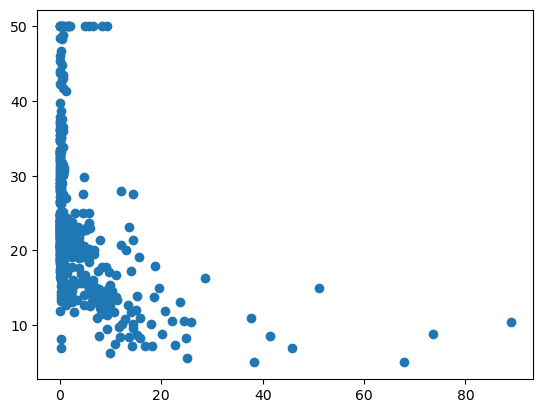

In [102]:
plt.scatter(df['crim'], df["medv"])

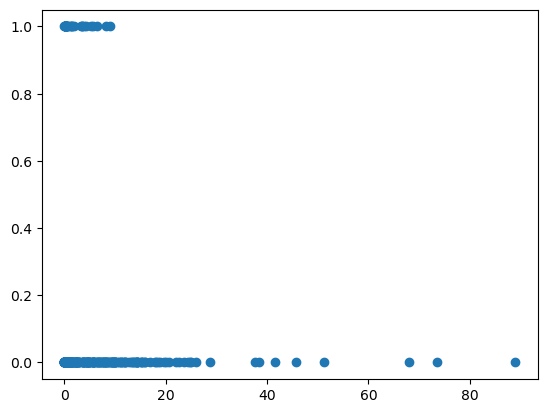

In [103]:
plt.scatter(df['crim'], df['chas'])

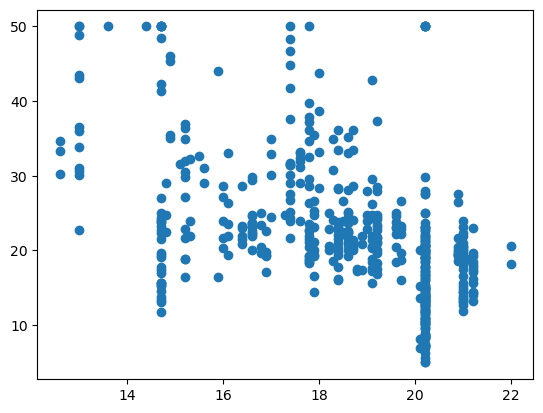

In [104]:
plt.scatter(df['ptratio'], df['medv'])

<Axes: xlabel='ptratio', ylabel='medv'>

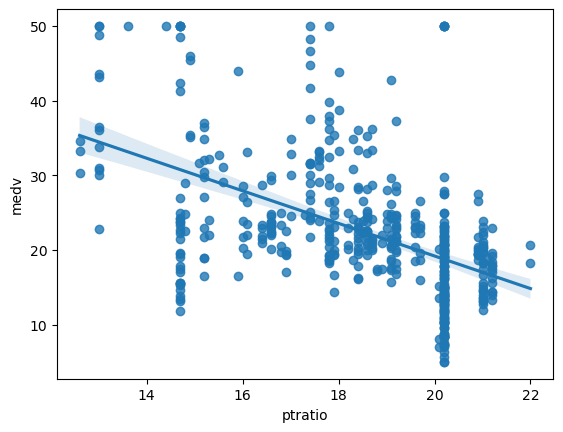

In [105]:
sns.regplot(x='ptratio', y='medv', data = df)

In [106]:
df.drop(columns = ['chas'], inplace=True)

In [107]:
df.columns

Index(['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [108]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [109]:
X

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [110]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [115]:
X_train = scaler.fit_transform(X_train)

In [116]:
X_test = scaler.transform(X_test)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
regression = LinearRegression()

In [119]:
regression.fit(X_train, y_train)

LinearRegression()

In [120]:
print(regression.coef_)

[-0.85996047  1.26307585  0.65415202 -1.81510183  2.59113288  0.62940551
 -2.88345929  2.89386852 -2.25999911 -2.06826816  1.23743263 -4.6574605 ]


In [121]:
reg_pred = regression.predict(X_test)

In [122]:
reg_pred

array([11.33827262, 23.0685507 , 15.34295249, 31.8580537 , 22.96323084,
       11.57913396, 13.06395762, 19.94407708, 21.01506924, 11.46860949,
       19.01491797, 30.02358503, -1.37912018, 25.72064165,  2.65960505,
        8.01272231, 23.9635783 , 18.62760886, 25.25527569, -7.05703538,
       13.05280186, 19.02215114, 27.01364374, 20.08248902, 22.36013093,
       16.73977411, 29.01336775, 23.89853169, 18.32137135, 21.09714498,
       21.3008859 , 30.53448658, 18.19250694, 31.69127173, 31.28929709,
       21.99125661,  7.11763281, 23.34421394,  7.3898201 , 25.20728048,
       13.28860939, 36.06399892, 14.57534543, 30.47070595, 12.52629774,
       28.40075098, 30.52298138, 20.04690771, 18.89841276, 13.53457016,
       23.97108657, 33.08089828, 16.57912432, 11.02096308, 34.68050666,
       33.99541144, 18.14316196, 18.62429199, 13.75208467, 27.54418053,
       20.45330604, 40.784648  , 20.06437631,  8.07698637, 25.87933159,
       27.46485466, 11.80268955,  7.2705818 , 27.08334818, 16.90

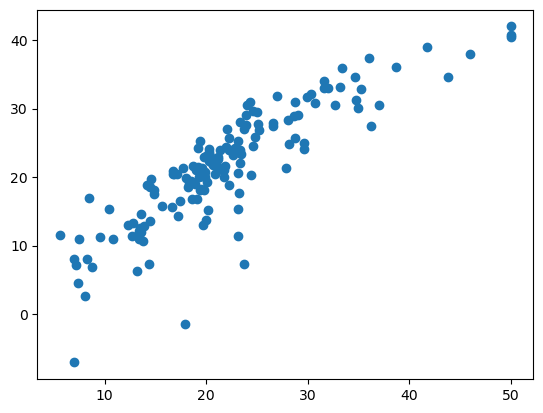

In [123]:
plt.scatter(y_test, reg_pred)

In [124]:
residual = y_test - reg_pred

In [125]:
residual

367    11.761727
76     -3.068551
380    -4.942952
160    -4.858054
108    -3.163231
         ...    
24     -0.197236
227    -1.353133
266    -0.187976
435     1.324461
5       2.991788
Name: medv, Length: 151, dtype: float64

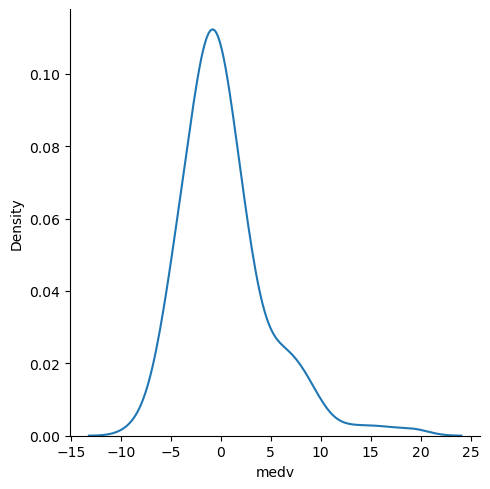

In [126]:
sns.displot(residual, kind='kde')

In [127]:
from sklearn.metrics import mean_squared_error

In [128]:
print(mean_squared_error(y_test, reg_pred))

19.084109933890367


In [129]:
test_input = [[0.00632, 18.0, 2.31, 0.538, 6.575, 65.2, 4.0900, 1, 296, 15.3, 396.90, 4.98]]
test_input = scaler.transform(test_input)
regression.predict(test_input)

D:\softwares\anaconda\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.52298138])

In [130]:
import pickle 

In [132]:
pickle.dump(regression, open("regmodel.pkl", 'wb'))

In [133]:
pickled_model = pickle.load(open('regmodel.pkl',  'rb'))

In [134]:
pickled_model.predict(test_input)

array([30.52298138])